In [5]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import KernelPCA
import spax

In [6]:
kpca = KernelPCA(
    n_components = 3,
    kernel = "rbf",
    gamma = 0.1,
    fit_inverse_transform = True,
    alpha = 1.0,
    )

In [7]:
M = 4000
N = 2
rho1 = 5 + np.random.normal(scale = 1, size = M // 2)
rho2 = 10 + np.random.normal(scale = 1, size = M // 2)
rho = np.concatenate((rho1, rho2))
phi = np.random.uniform(0.0, 2 * np.pi, size = M)
x = rho * np.cos(phi)
y = rho * np.sin(phi)
data = np.stack((x, y), axis = -1)
plt.scatter(x, y)
data.shape

(4000, 2)

In [8]:
kpca.fit(data)

KernelPCA(fit_inverse_transform=True, gamma=0.1, kernel='rbf', n_components=3)

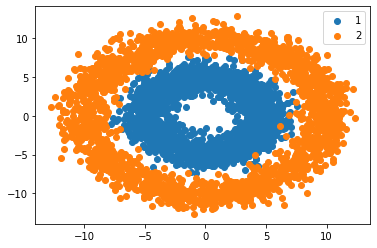

In [9]:
rho_1 = 5 + np.random.normal(scale = 1, size = M // 2)
phi_1 = np.random.uniform(0.0, 2 * np.pi, size = M // 2)
data_1 = np.stack((rho_1 * np.cos(phi_1), rho_1 * np.sin(phi_1)), axis = -1)
rho_2 = 10 + np.random.normal(scale = 1, size = M // 2)
phi_2 = np.random.uniform(0.0, 2 * np.pi, size = M // 2)
data_2 = np.stack((rho_2 * np.cos(phi_2), rho_2 * np.sin(phi_2)), axis = -1)
plt.scatter(data_1[:, 0], data_1[:, 1], label = "1")
plt.scatter(data_2[:, 0], data_2[:, 1], label = "2")
plt.legend()

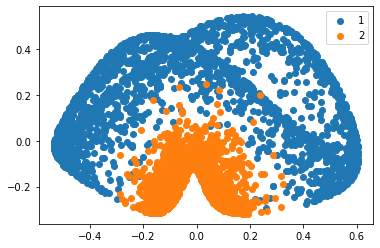

In [10]:
data_pca_1 = kpca.transform(data_1)
data_pca_2 = kpca.transform(data_2)
plt.scatter(data_pca_1[:, 1], data_pca_1[:, 2], label = "1")
plt.scatter(data_pca_2[:, 1], data_pca_2[:, 2], label = "2")
plt.legend()

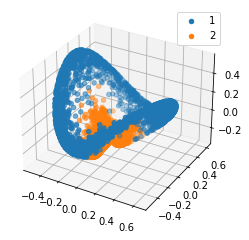

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data_pca_1[:, 0], data_pca_1[:, 1], data_pca_1[:, 2], label = "1")
ax.scatter(data_pca_2[:, 0], data_pca_2[:, 1], data_pca_2[:, 2], label = "2")
plt.legend()

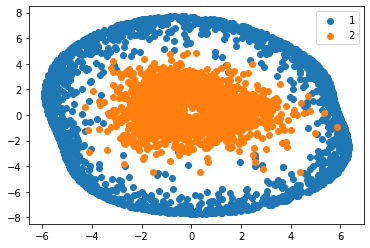

In [12]:
data_1_inv = kpca.inverse_transform(data_pca_1)
data_2_inv = kpca.inverse_transform(data_pca_2)
plt.scatter(data_1_inv[:, 0], data_1_inv[:, 1], label = "1")
plt.scatter(data_2_inv[:, 0], data_2_inv[:, 1], label = "2")
plt.legend()

In [13]:
import os
os.environ["JAX_PLATFORM_NAME"] = "cpu"
import jax
import jax.numpy as jnp

In [14]:
my_kpca = spax.KernelPCA(N = 3, kernel_kwargs = {"σ": np.sqrt(5.)}, inverse_kernel = "same", α = 1.0)
my_kpca.fit(data.T)

In [15]:
data_pca_1 = my_kpca.transform(data_1.T)
data_pca_2 = my_kpca.transform(data_2.T)
plt.scatter(data_pca_1[1], data_pca_1[2], label = "1")
plt.scatter(data_pca_2[1], data_pca_2[2], label = "2")

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data_pca_1[0], data_pca_1[1], data_pca_1[2], label = "1")
ax.scatter(data_pca_2[0], data_pca_2[1], data_pca_2[2], label = "1")
plt.legend()

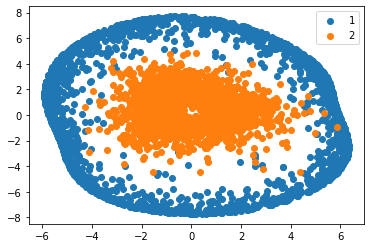

In [17]:
data_1_inv = my_kpca.inverse_transform(data_pca_1)
data_2_inv = my_kpca.inverse_transform(data_pca_2)
plt.scatter(*data_1_inv, label = "1")
plt.scatter(*data_2_inv, label = "2")
plt.legend()

# More Flexibility of an inverse transform
Sklear implements Kernel Ridge Regression transforming once more from N kPCA components with a kernel trick to another kernel space. For this, it uses a kernel specified initially.

Here we add two flexibilities:
- using no new kernel,
- changing a kernel in Kernel Ridge Regression.

## No new kernel
As one can see the results are very similar to having the same kernel, at least in this example.

In [18]:
my_kpca = spax.KernelPCA(N = 3, α = 1.0, kernel_kwargs = {"σ": np.sqrt(5.)}, inverse_kernel = None)
my_kpca.fit(data.T)

In [19]:
data_pca_1 = my_kpca.transform(data_1.T)
data_pca_2 = my_kpca.transform(data_2.T)
plt.scatter(data_pca_1[1], data_pca_1[2], label = "1")
plt.scatter(data_pca_2[1], data_pca_2[2], label = "2")

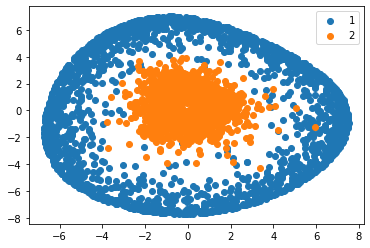

In [20]:
data_1_inv = my_kpca.inverse_transform(data_pca_1)
data_2_inv = my_kpca.inverse_transform(data_pca_2)
plt.scatter(*data_1_inv, label = "1")
plt.scatter(*data_2_inv, label = "2")
plt.legend()

## Different kernel

In [21]:
my_kpca = spax.KernelPCA(
    N = 3, 
    α = 1.0, 
    kernel = "rbf", kernel_kwargs = {"σ": np.sqrt(5.)}, 
    inverse_kernel = "rbf", inverse_kernel_kwargs = {"σ": np.sqrt(1/200)} # gamma = 100
    )
my_kpca.fit(data.T)

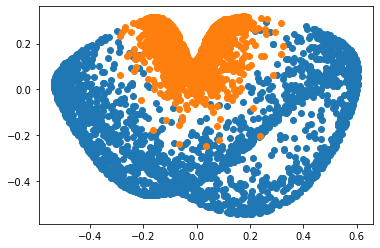

In [22]:
data_pca_1 = my_kpca.transform(data_1.T)
data_pca_2 = my_kpca.transform(data_2.T)
plt.scatter(data_pca_1[1], data_pca_1[2], label = "1")
plt.scatter(data_pca_2[1], data_pca_2[2], label = "2")

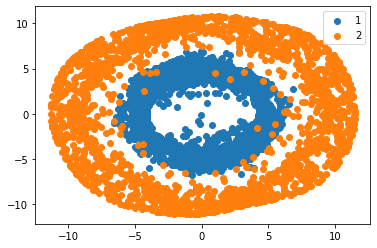

In [23]:
data_1_inv = my_kpca.inverse_transform(data_pca_1)
data_2_inv = my_kpca.inverse_transform(data_pca_2)
plt.scatter(*data_1_inv, label = "1")
plt.scatter(*data_2_inv, label = "2")
plt.legend()